In [2]:
import sys
sys.path.append('/Users/isabellechen/git-repos/tutorial/makemore/')

In [3]:
import torch

In [4]:
import matplotlib.pyplot as plt

In [5]:
words=open('names.txt','r').read().split()

b={}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram]=b.get(bigram, 0) + 1
        #print(ch1,ch2)

chars = sorted(set(''.join(words)))
char_to_int = {c: i+1 for i, c in enumerate(chars)}
int_to_char = {i+1: c for i, c in enumerate(chars)}
char_to_int['.']=0
int_to_char[0]='.'
N = torch.zeros((27,27), dtype=torch.int32)

In [6]:
xs, ys = [],[]

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char_to_int[ch1]
        ix2 = char_to_int[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


In [7]:
xs

tensor([ 0,  5, 13, 13,  1])

In [8]:
ys

# For instance, When 5 (i.e. xs[1]) is the input, we want the probability of 13 (i.e. ys[1]) to be high!

tensor([ 5, 13, 13,  1,  0])

# One-hot encodings
- We want integers, but we cannot put it directly into NN.
- NN is made up of neurons, and neurons are made up of weights and biases.
- We shouldn't multiply weights (and biases) by integers.

In [9]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27)
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

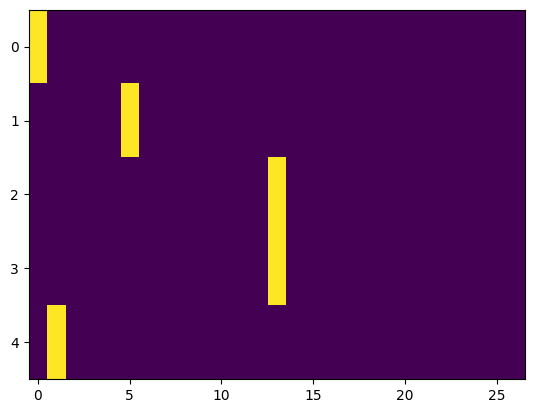

In [10]:
plt.imshow(xenc, aspect='auto')

In [11]:
# Cast the list of ints to list of floats
xenc = xenc.float()
xenc.dtype

torch.float32

In [12]:
# RECALL: W dot x + b

# Initialize W
W = torch.randn((27, 1))
xenc @ W # Matrix multiplication function, which produces the log counts

# Think about this (5, 27) x (27, 1) = (5, 1): 5 activations for 5 inputs

tensor([[-0.0045],
        [ 0.5301],
        [-1.2283],
        [-1.2283],
        [-0.6871]])

In [13]:
# Taking this one step further, we can have multiple neurons in the hidden layer

W = torch.randn((27, 27)) 
# the first 27 is the number of input neurons
# the second 27 is the number of neuron in the hidden layer
logits = xenc @ W

logits

tensor([[ 1.3814, -3.2431,  3.2540, -0.1137,  0.2812,  1.1645, -0.2796, -0.5477,
          0.4394, -1.0565,  0.2692, -0.9781,  0.8879, -1.1311,  0.9895,  0.1794,
          0.1834,  0.7107, -2.6506,  2.4171, -0.2975, -0.8815,  0.0172, -0.9695,
          0.5162, -0.3191,  0.2113],
        [-0.4322,  1.4631,  0.6997,  0.2058,  0.6570,  0.1313, -0.4899,  0.5045,
          1.8324, -0.6401, -0.8893,  0.1733,  1.0635,  1.2387, -0.0138, -1.6044,
          2.3672, -0.5829,  0.0129, -0.6739, -0.0633, -0.3612, -1.3129,  0.7221,
          1.1962, -0.9146, -2.0454],
        [-0.0369,  0.9454,  1.6991,  0.4702, -0.1503, -0.8581, -0.5607, -0.0366,
         -0.5037,  0.2984, -0.7716,  1.2557, -2.0261,  0.5080, -0.2577, -1.6995,
          0.0199, -0.4689,  0.2402,  1.2434, -0.2129,  0.9037,  0.9149,  1.5517,
          0.3690, -0.3650,  0.4971],
        [-0.0369,  0.9454,  1.6991,  0.4702, -0.1503, -0.8581, -0.5607, -0.0366,
         -0.5037,  0.2984, -0.7716,  1.2557, -2.0261,  0.5080, -0.2577, -1.6995

In [14]:
counts = logits.exp() # Exponentiate the log counts to get the counts
probs = counts / counts.sum(1, keepdim=True) # Normalize the counts to get the probabilities
probs # The probability of the next character given the current character. The calculation is known as the softmax function

tensor([[0.0589, 0.0006, 0.3830, 0.0132, 0.0196, 0.0474, 0.0112, 0.0086, 0.0230,
         0.0051, 0.0194, 0.0056, 0.0359, 0.0048, 0.0398, 0.0177, 0.0178, 0.0301,
         0.0010, 0.1659, 0.0110, 0.0061, 0.0150, 0.0056, 0.0248, 0.0108, 0.0183],
        [0.0130, 0.0864, 0.0403, 0.0246, 0.0386, 0.0228, 0.0123, 0.0331, 0.1250,
         0.0105, 0.0082, 0.0238, 0.0579, 0.0690, 0.0197, 0.0040, 0.2133, 0.0112,
         0.0203, 0.0102, 0.0188, 0.0139, 0.0054, 0.0412, 0.0661, 0.0080, 0.0026],
        [0.0225, 0.0602, 0.1279, 0.0374, 0.0201, 0.0099, 0.0133, 0.0225, 0.0141,
         0.0315, 0.0108, 0.0821, 0.0031, 0.0389, 0.0181, 0.0043, 0.0239, 0.0146,
         0.0297, 0.0811, 0.0189, 0.0577, 0.0584, 0.1104, 0.0338, 0.0162, 0.0384],
        [0.0225, 0.0602, 0.1279, 0.0374, 0.0201, 0.0099, 0.0133, 0.0225, 0.0141,
         0.0315, 0.0108, 0.0821, 0.0031, 0.0389, 0.0181, 0.0043, 0.0239, 0.0146,
         0.0297, 0.0811, 0.0189, 0.0577, 0.0584, 0.1104, 0.0338, 0.0162, 0.0384],
        [0.1414, 0.0189,

In [15]:
probs[0].sum()

tensor(1.0000)

In [16]:
# How the model is doing with random W

l = len(words[0])+1
nlls = torch.zeros(l)

for i in range(l):
    # i-th bigram
    x=xs[i].item()
    y=ys[i].item()

    # The probability of the next character given the current character
    print(f"Bigram:{int_to_char[x]}{int_to_char[y]}")
    print(f"Input to NN:{x}")
    print(f"Output probability predictions:{probs[i]}")
    print(f"Acutal:{int_to_char[y]}")
    p = probs[i, y]
    print(f"Probability assigned by the net to the correct charater:{p.item()}")
    nll = -torch.log(p).item()
    print(f"Negative log likelihood:{nll}")
    nlls[i] = nll
    print("----\n")

Bigram:.e
Input to NN:0
Output probability predictions:tensor([0.0589, 0.0006, 0.3830, 0.0132, 0.0196, 0.0474, 0.0112, 0.0086, 0.0230,
        0.0051, 0.0194, 0.0056, 0.0359, 0.0048, 0.0398, 0.0177, 0.0178, 0.0301,
        0.0010, 0.1659, 0.0110, 0.0061, 0.0150, 0.0056, 0.0248, 0.0108, 0.0183])
Acutal:e
Probability assigned by the net to the correct charater:0.047397878021001816
Negative log likelihood:3.049177885055542
----

Bigram:em
Input to NN:5
Output probability predictions:tensor([0.0130, 0.0864, 0.0403, 0.0246, 0.0386, 0.0228, 0.0123, 0.0331, 0.1250,
        0.0105, 0.0082, 0.0238, 0.0579, 0.0690, 0.0197, 0.0040, 0.2133, 0.0112,
        0.0203, 0.0102, 0.0188, 0.0139, 0.0054, 0.0412, 0.0661, 0.0080, 0.0026])
Acutal:m
Probability assigned by the net to the correct charater:0.06900893896818161
Negative log likelihood:2.6735191345214844
----

Bigram:mm
Input to NN:13
Output probability predictions:tensor([0.0225, 0.0602, 0.1279, 0.0374, 0.0201, 0.0099, 0.0133, 0.0225, 0.0141,
    

# Optimization

In [17]:

num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  5


In [18]:
# gradient descent
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() # Familiar with this? Regularization term!
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.778970241546631


In [19]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(int_to_char[ix])
    if ix == 0:
      break
  print(''.join(out))

ema.
emmmma.
ema.
ema.
emma.
